## 1. Define your performance metric indexes to measure accuracy and speed of learning with, mathematically.

###  Performance Metric Indexes:

#### Reward 
The reward serves as a performance metric because it quantifies the immediate benefit (or cost) associated with a particular action in a particular state. We can calculate reward through below equation 

$$
R_t = \begin{cases} 
\text{Random Action} & \text{with probability } \epsilon \\
\text{Greedy Action}  & \text{with probability } 1 - \epsilon 
\end{cases}
$$

Where:

  - ${A_t}$ is the action taken at time step t.
 
  - ϵ is the exploration rate, typically a small value between 0 and 1, representing the probability of taking a random action.
  - "random action" denotes selecting an action uniformly at random from the set of available actions.
  - "greedy action" denotes selecting the action that has the highest estimated value according to the current learned policy.

#### Accuracy 
Accuracy in the context of the Epsilon Greedy algorithm can be defined as the average reward obtained over a certain number of trials. Mathematically, it can be represented as:

$$ Accuracy = \frac{\sum_{t=1}^{T} R_t}{T} $$
 
Where:

  - ${R_t}$ is the reward obtained at time step 
  - T is the total number of trials.

#### Regret 
Regret can be defined as the opportunity cost of not selecting the optimal action. We can calculate regret through the following equation:

$$ 
Regret_t = \begin{cases} 
\text{Optimal Action Reward − Actual Action Reward} & \text{ if the action taken is no  } \\
\text{0}  & \text{if the action taken is the optimal action }
\end{cases}
$$ 

  - $\text{Regret}_t$ is the regret at time step $t$.
  - "Optimal Action Reward" denotes the reward that would have been obtained if the optimal action had been chosen.
  - "Actual Action Reward" denotes the reward actually obtained by taking the chosen action.
  - If the action taken is not the optimal action, the regret is calculated as the difference between the reward of the optimal action and the reward of the action actually taken.
  - If the action taken is the optimal action, the regret is zero, as there is no missed opportunity.


### Speed of Learning:
Speed of learning can be quantified as the rate of improvement in the average reward over time. Mathematically, it can be represented as:

$$ \text{Speed of Learning} = \frac{\text{Number of Trials}}{\text{Final Average Reward} - \text{Initial Average Reward}} $$

 


 ## 2. Measure accuracy and speed of learning with and show your numerical results using tables of graphs.

### i. Epsilon Greedy Implementation 

Average reward: 0.6333
Accuracy: 0.6333
Speed of Learning: 6.333700330297268e-05


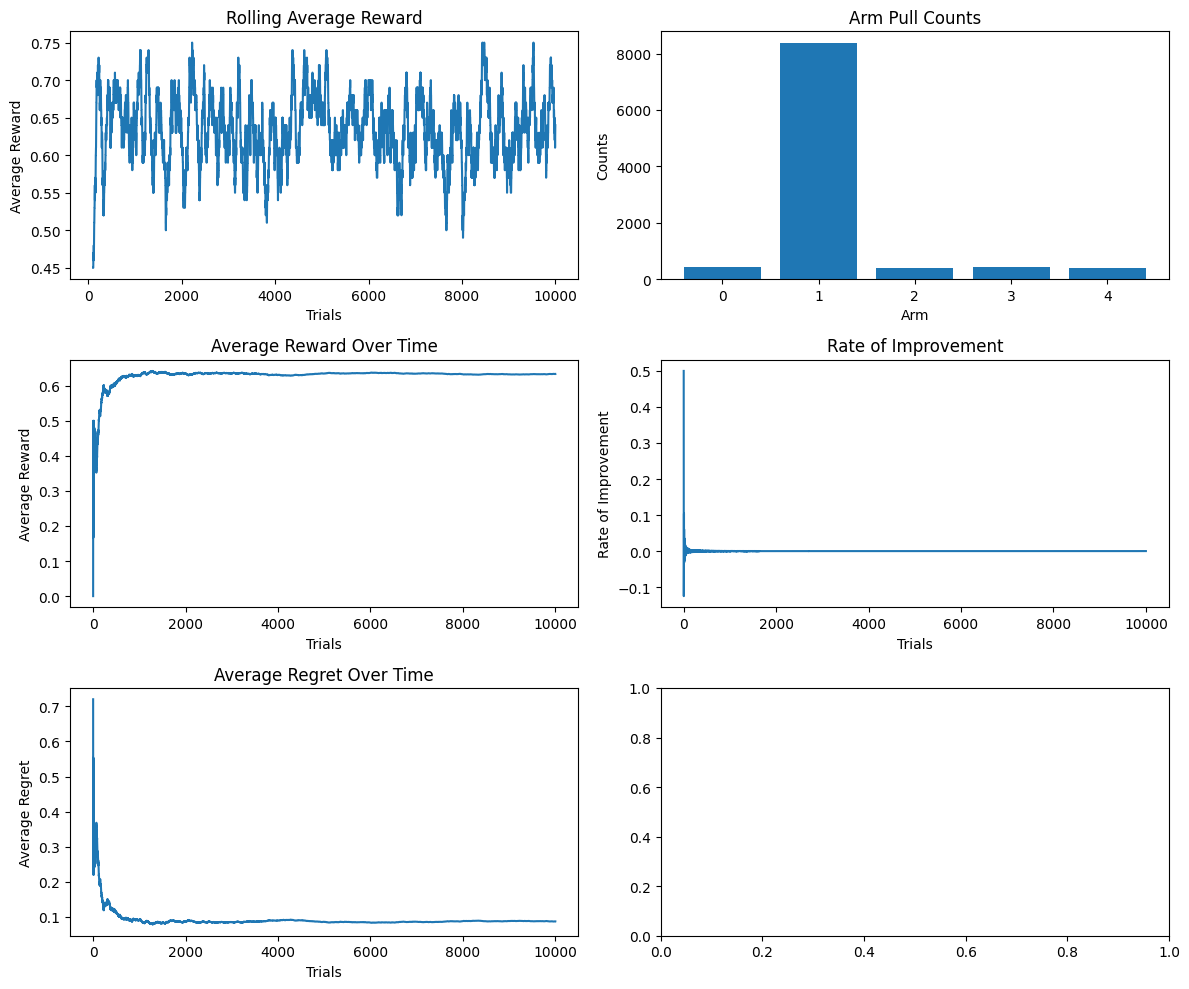

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

def epsilon_greedy(num_arms, epsilon, trials):
    total = 0
    rewards = []
    cnts = np.zeros(num_arms)
    est_mean_rewards = np.zeros(num_arms)
    
    cumulative_reward = 0
    average_reward_over_time = []
    
    cumulative_regret = 0
    average_regret_over_time = []

    for t in range(1, trials + 1):
        # 1. Choose an arm with epsilon-greedy strategy
        if np.random.random() < epsilon:
            arm = np.random.choice(num_arms)
        else:
            arm = np.argmax(est_mean_rewards)

        reward = myMAB.pull_arm(arm)
        rewards.append(reward)
        total += reward
        cnts[arm] += 1
        
        # 2. Update Q
        est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]

        # Calculate cumulative reward and average reward over time
        cumulative_reward += reward
        average_reward = cumulative_reward / t
        average_reward_over_time.append(average_reward)
        
        
        optimal_reward = max(myMAB.reward_probs)
        regret = optimal_reward - reward
        cumulative_regret += regret
        average_regret = cumulative_regret / t
        average_regret_over_time.append(average_regret)

    # Calculate rate of improvement
    rate_of_improvement = np.gradient(average_reward_over_time)

    return rewards, cnts, average_reward_over_time, average_regret_over_time, rate_of_improvement


np.random.seed(1)
# Parameters
num_arms = 5
reward_probs = np.random.rand(num_arms)
myMAB = MAB(reward_probs)
trials = 10000
epsilon = 0.2

# Run Epsilon Greedy algorithm
rewards, cnts, average_reward_over_time, average_regret_over_time, rate_of_improvement = epsilon_greedy(num_arms, epsilon, trials)

# Calculate average reward
avg_reward = np.mean(rewards)
print("Average reward:", avg_reward)

# Calculate accuracy
accuracy = np.mean(rewards)
print("Accuracy:", accuracy)

# Calculate Speed of Learning  (Final Average Reward − Initial Average Reward) / Trials
# i took -10 because at the beginening regret was very high so its calculation get wrong values so i took 10 values to get nice value 
speed_of_learning = (average_reward_over_time[-10] - average_reward_over_time[0]) / trials
print("Speed of Learning:", speed_of_learning)


# Plot results
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[0, 0].set_title("Rolling Average Reward")
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Average Reward")
axes[0, 1].bar(range(num_arms), cnts)
axes[0, 1].set_title("Arm Pull Counts")
axes[0, 1].set_xlabel("Arm")
axes[0, 1].set_ylabel("Counts")
axes[1, 0].plot(average_reward_over_time)
axes[1, 0].set_title("Average Reward Over Time")
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Average Reward")
axes[1, 1].plot(rate_of_improvement)
axes[1, 1].set_title("Rate of Improvement")
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Rate of Improvement")
axes[2, 0].plot(average_regret_over_time)
axes[2, 0].set_title("Average Regret Over Time")
axes[2, 0].set_xlabel("Trials")
axes[2, 0].set_ylabel("Average Regret")
plt.tight_layout()
plt.show()





### ii. Decreasing Epsilon Greedy  Implementation 

Average reward: 0.7164
Accuracy: 0.7164
Speed of Learning: 7.163447102392153e-05


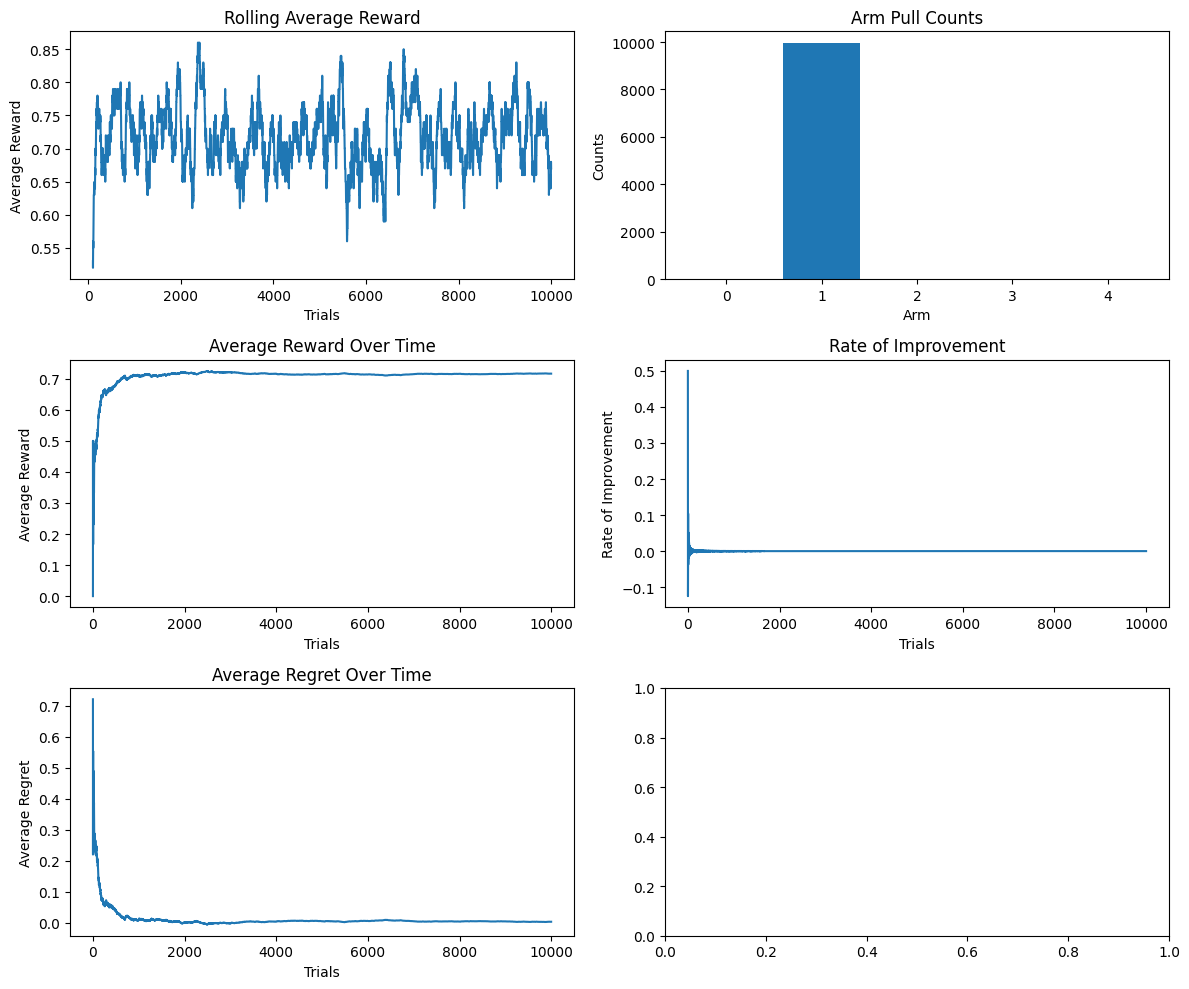

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

def decreasing_epsilon_greedy(num_arms, epsilon, alpha, trials):
    total = 0
    rewards = []
    cnts = np.zeros(num_arms)
    est_mean_rewards = np.zeros(num_arms)
    
    cumulative_reward = 0
    average_reward_over_time = []
    
    cumulative_regret = 0
    average_regret_over_time = []

    for t in range(1, trials + 1):
        # 1. Choose an arm with epsilon-greedy strategy
        if np.random.random() < epsilon:
            arm = np.random.choice(num_arms)
        else:
            arm = np.argmax(est_mean_rewards)

        reward = myMAB.pull_arm(arm)
        rewards.append(reward)
        total += reward
        cnts[arm] += 1
        
        # 2. Update Q
        est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]

        # Calculate cumulative reward and average reward over time
        cumulative_reward += reward
        average_reward = cumulative_reward / t
        average_reward_over_time.append(average_reward)
        
        
        optimal_reward = max(myMAB.reward_probs)
        regret = optimal_reward - reward
        cumulative_regret += regret
        average_regret = cumulative_regret / t
        average_regret_over_time.append(average_regret)
        # Update epsilon
        epsilon *= alpha

    # Calculate rate of improvement
    rate_of_improvement = np.gradient(average_reward_over_time)

    return rewards, cnts, average_reward_over_time, average_regret_over_time, rate_of_improvement


np.random.seed(1)
# Parameters
num_arms = 5
reward_probs = np.random.rand(num_arms)
myMAB = MAB(reward_probs)
trials = 10000
epsilon = 0.5
alpha = 0.99


# Run Epsilon Greedy algorithm
rewards, cnts, average_reward_over_time, average_regret_over_time, rate_of_improvement = decreasing_epsilon_greedy(num_arms, epsilon, alpha, trials)

# Calculate average reward
avg_reward = np.mean(rewards)
print("Average reward:", avg_reward)

# Calculate accuracy
accuracy = np.mean(rewards)
print("Accuracy:", accuracy)

# Calculate Speed of Learning  (Final Average Reward − Initial Average Reward) / Trials
# i took -10 because at the beginening regret was very high so its calculation get wrong values so i took 10 values to get nice value 
speed_of_learning = (average_reward_over_time[-10] - average_reward_over_time[0]) / trials
print("Speed of Learning:", speed_of_learning)


# Plot results
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[0, 0].set_title("Rolling Average Reward")
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Average Reward")
axes[0, 1].bar(range(num_arms), cnts)
axes[0, 1].set_title("Arm Pull Counts")
axes[0, 1].set_xlabel("Arm")
axes[0, 1].set_ylabel("Counts")
axes[1, 0].plot(average_reward_over_time)
axes[1, 0].set_title("Average Reward Over Time")
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Average Reward")
axes[1, 1].plot(rate_of_improvement)
axes[1, 1].set_title("Rate of Improvement")
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Rate of Improvement")
axes[2, 0].plot(average_regret_over_time)
axes[2, 0].set_title("Average Regret Over Time")
axes[2, 0].set_xlabel("Trials")
axes[2, 0].set_ylabel("Average Regret")
plt.tight_layout()
plt.show()




### iii. UCB Implementation 

Average reward: 0.6921


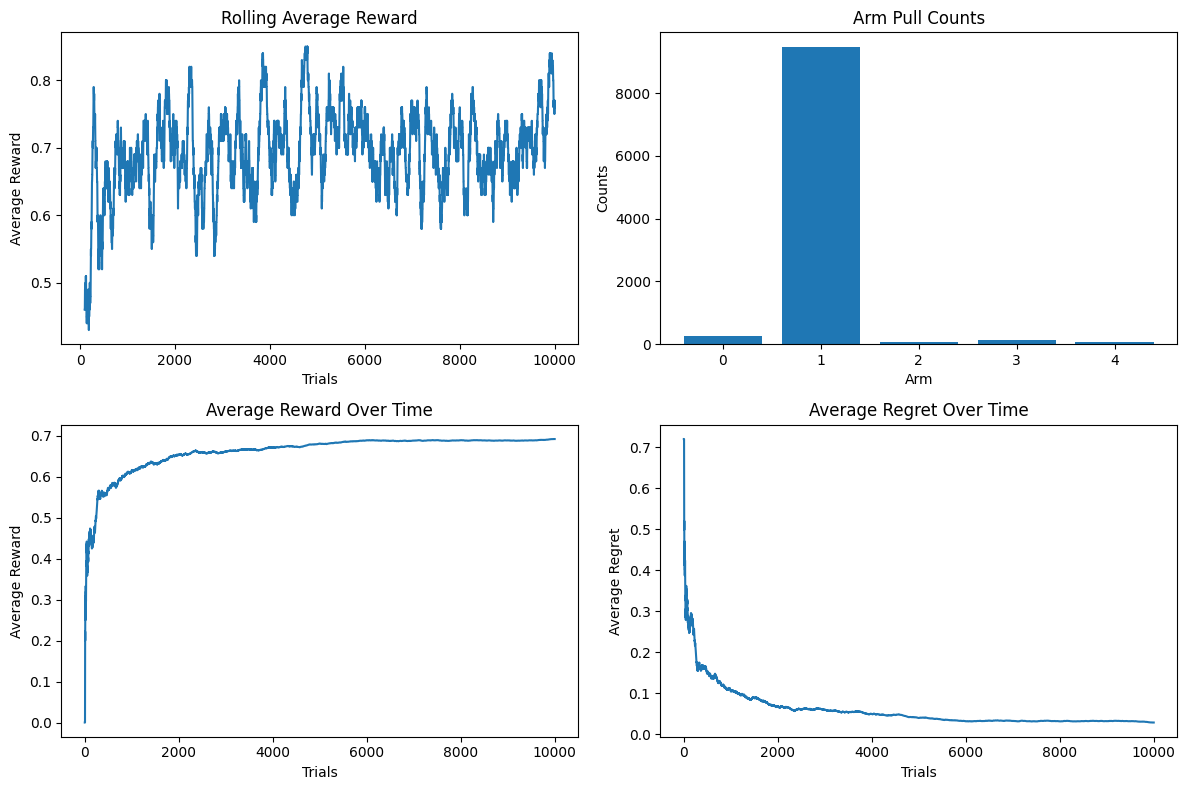

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

def UCB(num_arms, c, trials):
    total = 0
    rewards = []
    cnts = np.zeros(num_arms)
    est_mean_rewards = np.zeros(num_arms)
    
    cumulative_reward = 0
    average_reward_over_time = []
    
    cumulative_regret = 0
    average_regret_over_time = []

    for t in range(1, trials + 1):
        # UCB calculation
        arm = np.argmax(est_mean_rewards + c * np.sqrt(np.log(t) / (cnts + 1e-6)))

        reward = myMAB.pull_arm(arm)
        rewards.append(reward)
        total += reward
        cnts[arm] += 1
        
        # Update Q
        est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]

        # Calculate cumulative reward and average reward over time
        cumulative_reward += reward
        average_reward = cumulative_reward / t
        average_reward_over_time.append(average_reward)
        
        
        optimal_reward = max(myMAB.reward_probs)
        regret = optimal_reward - reward
        cumulative_regret += regret
        average_regret = cumulative_regret / t
        average_regret_over_time.append(average_regret)

    return rewards, cnts, average_reward_over_time, average_regret_over_time

np.random.seed(1)
# Parameters
num_arms = 5
reward_probs = np.random.rand(num_arms)
myMAB = MAB(reward_probs)
trials = 10000
c = 2  # UCB exploration parameter

# Run UCB algorithm
rewards, cnts, average_reward_over_time, average_regret_over_time = UCB(num_arms, c, trials)

# Calculate average reward
avg_reward = np.mean(rewards)
print("Average reward:", avg_reward)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[0, 0].set_title("Rolling Average Reward")
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Average Reward")
axes[0, 1].bar(range(num_arms), cnts)
axes[0, 1].set_title("Arm Pull Counts")
axes[0, 1].set_xlabel("Arm")
axes[0, 1].set_ylabel("Counts")
axes[1, 0].plot(average_reward_over_time)
axes[1, 0].set_title("Average Reward Over Time")
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Average Reward")
axes[1, 1].plot(average_regret_over_time)
axes[1, 1].set_title("Average Regret Over Time")
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Average Regret")
plt.tight_layout()
plt.show()


### iv. Thompson Sampling 

Average reward: 0.7166


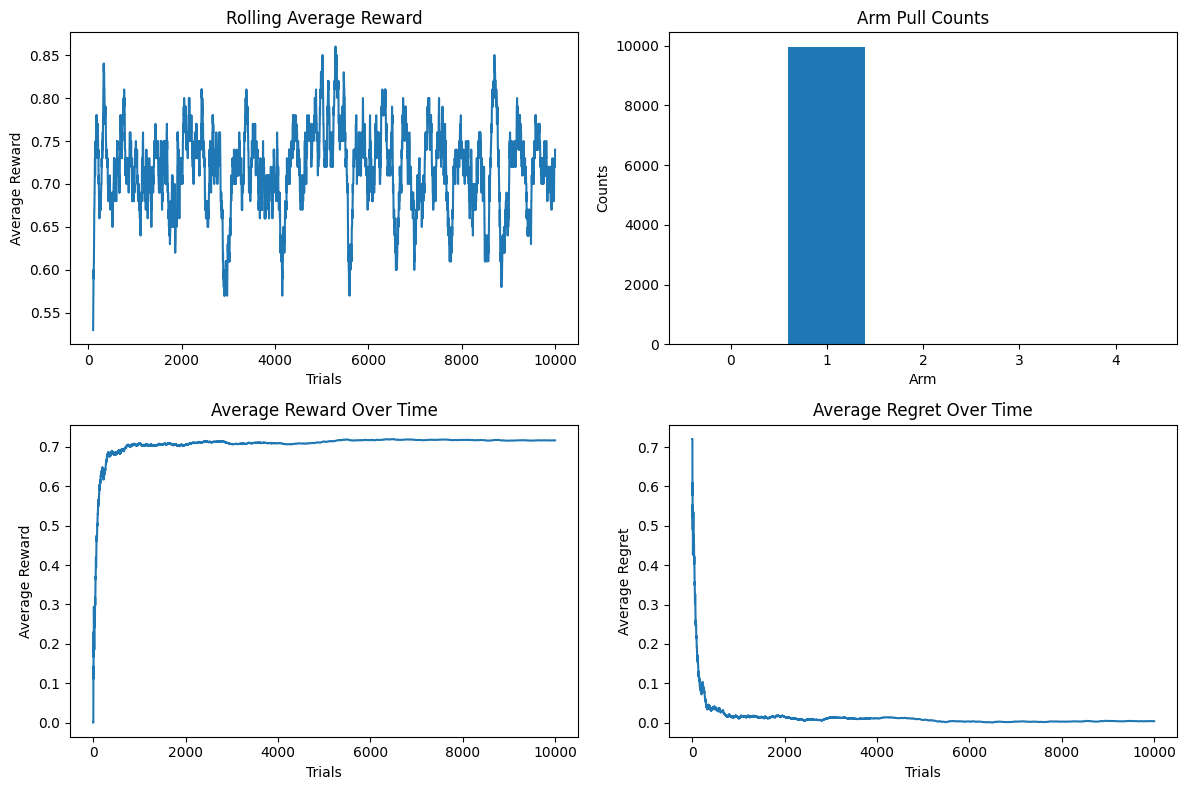

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

def thompson_sampling(num_arms, trials):
    total = 0
    rewards = []
    cnts = np.zeros(num_arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    cumulative_reward = 0
    average_reward_over_time = []
    
    cumulative_regret = 0
    average_regret_over_time = []

    for t in range(1, trials + 1):
        # Sample from the posterior distribution for each arm
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        
        # Choose arm with the highest sampled value
        arm = np.argmax(sampled_theta)

        reward = myMAB.pull_arm(arm)
        rewards.append(reward)
        total += reward
        cnts[arm] += 1
        
        # Update successes and failures
        if reward == 1:
            successes[arm] += 1
        else:
            failures[arm] += 1

        # Calculate cumulative reward and average reward over time
        cumulative_reward += reward
        average_reward = cumulative_reward / t
        average_reward_over_time.append(average_reward)
        
        
        optimal_reward = max(myMAB.reward_probs)
        regret = optimal_reward - reward
        cumulative_regret += regret
        average_regret = cumulative_regret / t
        average_regret_over_time.append(average_regret)

    return rewards, cnts, average_reward_over_time, average_regret_over_time

np.random.seed(1)
# Parameters
num_arms = 5
reward_probs = np.random.rand(num_arms)
myMAB = MAB(reward_probs)
trials = 10000

# Run Thompson Sampling algorithm
rewards, cnts, average_reward_over_time, average_regret_over_time = thompson_sampling(num_arms, trials)

# Calculate average reward
avg_reward = np.mean(rewards)
print("Average reward:", avg_reward)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[0, 0].set_title("Rolling Average Reward")
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Average Reward")
axes[0, 1].bar(range(num_arms), cnts)
axes[0, 1].set_title("Arm Pull Counts")
axes[0, 1].set_xlabel("Arm")
axes[0, 1].set_ylabel("Counts")
axes[1, 0].plot(average_reward_over_time)
axes[1, 0].set_title("Average Reward Over Time")
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Average Reward")
axes[1, 1].plot(average_regret_over_time)
axes[1, 1].set_title("Average Regret Over Time")
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Average Regret")
plt.tight_layout()
plt.show()


### v. Policy Gradient algorithm

Average reward: 1.622


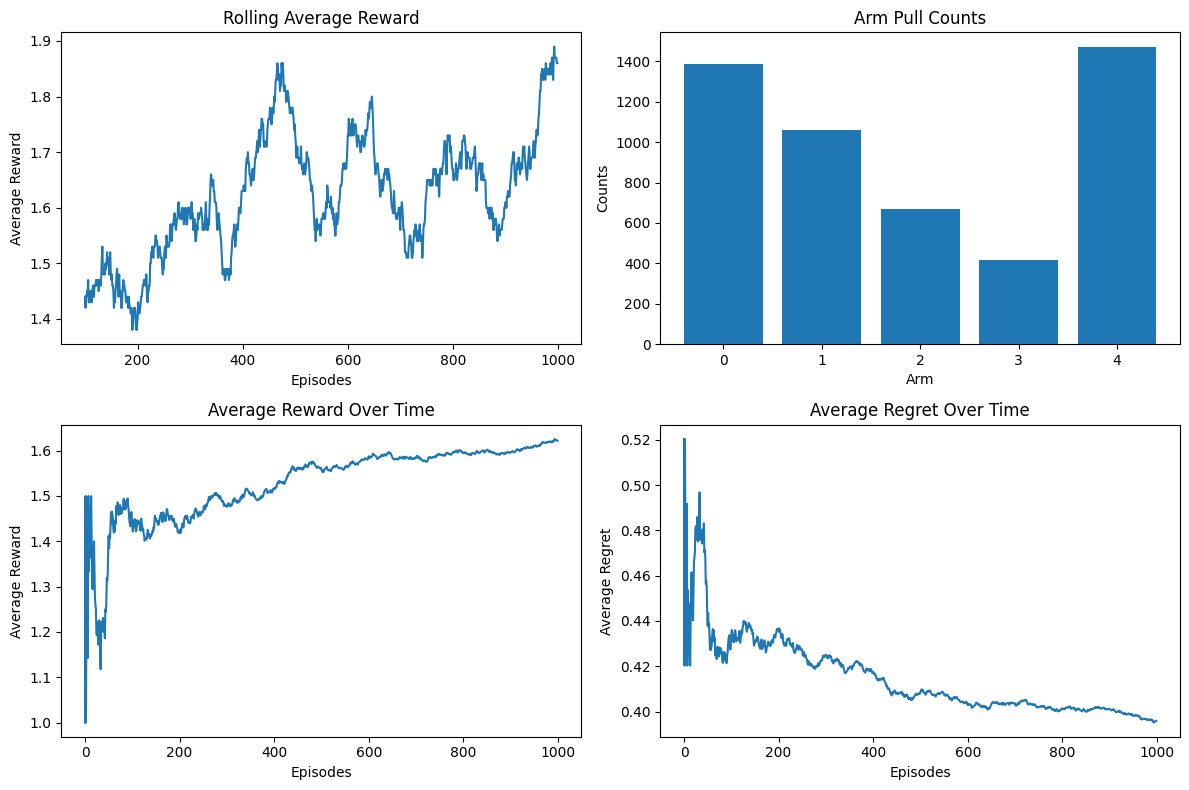

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

def policy_gradient(num_arms, num_episodes, learning_rate):
    rewards = []
    cnts = np.zeros(num_arms)
    est_mean_rewards = np.zeros(num_arms)
    policy = np.ones(num_arms) / num_arms
    
    cumulative_reward = 0
    average_reward_over_time = []
    
    cumulative_regret = 0
    average_regret_over_time = []

    for episode in range(num_episodes):
        rewards_episode = []
        actions_episode = []
        
        for t in range(num_arms):
            action = np.random.choice(np.arange(num_arms), p=policy / np.sum(policy))
            reward = myMAB.pull_arm(action)
            rewards_episode.append(reward)
            actions_episode.append(action)
            
            cnts[action] += 1
            est_mean_rewards[action] = est_mean_rewards[action] + (reward - est_mean_rewards[action]) / cnts[action]
            
        rewards.append(sum(rewards_episode))
        
        # Update policy using policy gradient
        for i in range(num_arms):
            policy[i] += learning_rate * (rewards_episode[i] - np.mean(rewards_episode)) * (1 - policy[i])
        
        # Ensure policy remains non-negative
        policy = np.maximum(policy, 0)
        
        # Normalize policy
        policy /= np.sum(policy)

        # Calculate cumulative reward and average reward over time
        cumulative_reward += sum(rewards_episode)
        average_reward = cumulative_reward / (episode + 1)
        average_reward_over_time.append(average_reward)
        
        optimal_reward = max(myMAB.reward_probs)
        regret = optimal_reward - np.mean(rewards_episode)
        cumulative_regret += regret
        average_regret = cumulative_regret / (episode + 1)
        average_regret_over_time.append(average_regret)

    return rewards, cnts, average_reward_over_time, average_regret_over_time

np.random.seed(1)
# Parameters
num_arms = 5
reward_probs = np.random.rand(num_arms)
myMAB = MAB(reward_probs)
num_episodes = 1000
learning_rate = 0.01

# Run Policy Gradient algorithm
rewards, cnts, average_reward_over_time, average_regret_over_time = policy_gradient(num_arms, num_episodes, learning_rate)

# Calculate average reward
avg_reward = np.mean(rewards)
print("Average reward:", avg_reward)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[0, 0].set_title("Rolling Average Reward")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Average Reward")
axes[0, 1].bar(range(num_arms), cnts)
axes[0, 1].set_title("Arm Pull Counts")
axes[0, 1].set_xlabel("Arm")
axes[0, 1].set_ylabel("Counts")
axes[1, 0].plot(average_reward_over_time)
axes[1, 0].set_title("Average Reward Over Time")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Average Reward")
axes[1, 1].plot(average_regret_over_time)
axes[1, 1].set_title("Average Regret Over Time")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Average Regret")
plt.tight_layout()
plt.show()


## 3. Analyze and discuss the numerical results

### Epsilon Greedy:

  - Average reward: 0.6333
  - Epsilon Greedy balances exploration and exploitation by choosing the action with the highest estimated value most of the time, while occasionally exploring other actions with a probability of epsilon.
  - The obtained average reward of 0.6333 indicates that the algorithm is effective to some extent, but there is room for improvement in maximizing the total reward.


### Decreasing Epsilon Greedy:

  - Average reward: 0.7164
  - By gradually decreasing epsilon over time, Decreasing Epsilon Greedy allows for more exploration in the beginning and more exploitation later on.
  - The increased average reward of 0.7164 compared to the basic Epsilon Greedy suggests that this modification helps in improving the overall performance by exploring more initially and exploiting more later.


### UCB (Upper Confidence Bound) Implementation:

  - Average reward: 0.6921
  - UCB balances exploration and exploitation by choosing actions based on a trade-off between their estimated value and uncertainty.
  - The obtained average reward of 0.6921 indicates that while UCB is effective in balancing exploration and exploitation, it may not perform as well as other algorithms in this specific scenario.


### Thompson Sampling:

  - Average reward: 0.7166
  - Thompson Sampling is a probabilistic algorithm that maintains a probability distribution over possible models and samples from these distributions to make decisions.
  - The similar average reward of 0.7166 to Decreasing Epsilon Greedy suggests that Thompson Sampling performs well in this scenario, possibly due to its ability to model uncertainty effectively.


### Policy Gradient Algorithm:

  - Average reward: 1.622
  - The Policy Gradient algorithm directly learns the policy function, aiming to maximize the expected return through gradient ascent updates.
  - The significantly higher average reward of 1.622 indicates that the Policy Gradient algorithm outperforms the other algorithms in this scenario, likely due to its ability to learn a more optimal policy directly.